# IME672A GROUP-5 <br> Medical Insurance Cost Prediction

#### <i> Medical emergencies can occur at any moment, without any prior notice. In such cases, a medical insurance policy is your saviour. Nowadays company want to predict the insurance charges of a person based on thier profile before they actually take up on the insurance. Therefore, our task is to find the insurance cost of a person based on thier features. </i>

# **Problem Statement**
#### <i>To accurately predict the insurance charges of a person based on certain features. <br> The features are- the person's age, sex, bmi, number of children, region, and whether he/she smokes or not.

#### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import time

#### Reading the dataset

In [2]:
df=pd.read_csv(r"C:\Users\Aditya\Downloads\insurance.csv")
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

#### Describing the data

In [3]:
# Find the datatype and count of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Checking for null values 

In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Finding the unique values in each column

In [5]:
for i in df.columns:
  print(i)
  print(pd.unique(df[i]))

age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex
['female' 'male']
bmi
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34

### Main features of the data.
##### A total of 7 columns and 1338 rows are present <br> None of the columns have a NULL value, therefore data cleaning is not required <br> Column Description : <br> Categorical Features : <i>sex, smoker, region</i> <br> Continuous Features : <i>age, children, bmi, charges </i><br> Label/dependent variable : charges

#### Describing the dataset

In [6]:
df.describe()[1:][['age','children','bmi', 'charges']].T.style.background_gradient(cmap=sns.light_palette("purple", as_cmap=True), axis=1)

### <i>Exploratory Data Analysis</i>

### Outliers

<AxesSubplot:>

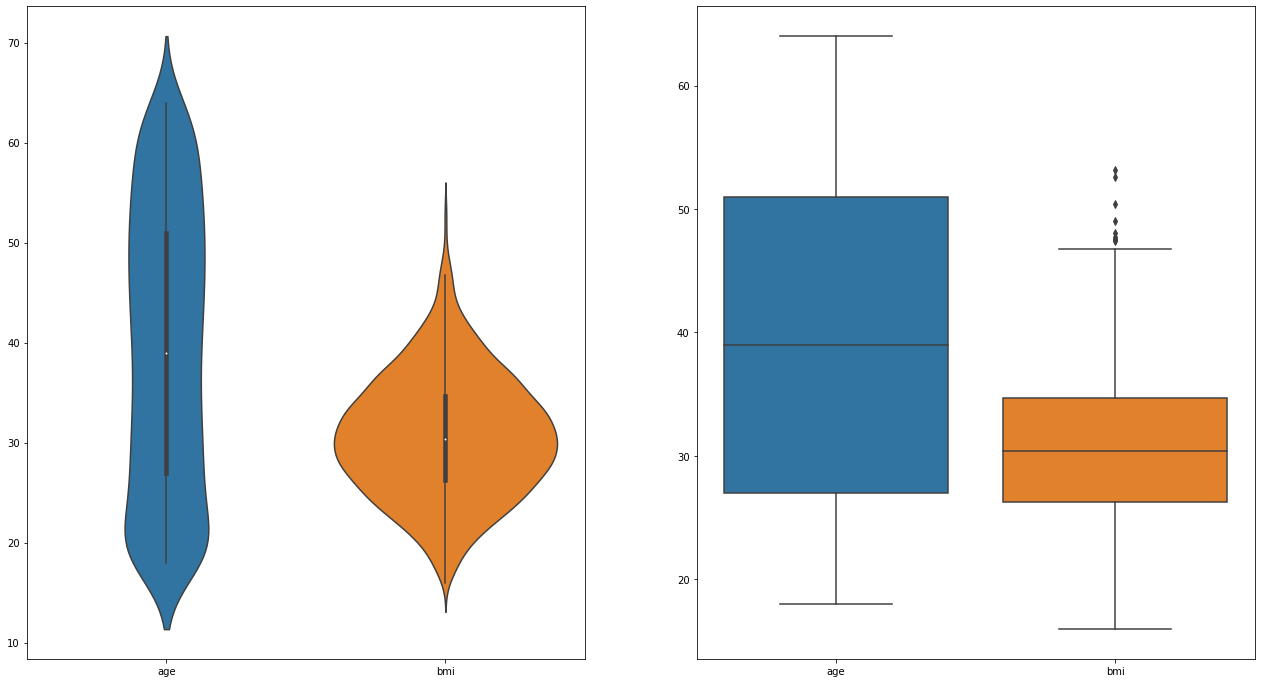

In [7]:
f, ax = plt.subplots(figsize=(22, 12))
plt.subplot(1, 2, 1)
sns.violinplot(data = df.drop(['charges','children'],axis=1))
plt.subplot(1,2,2)
sns.boxplot(data = df.drop(['charges','children'],axis=1))

Inference: There are 9 outliers in the bmi attribute in the dataframe

<AxesSubplot:ylabel='charges'>

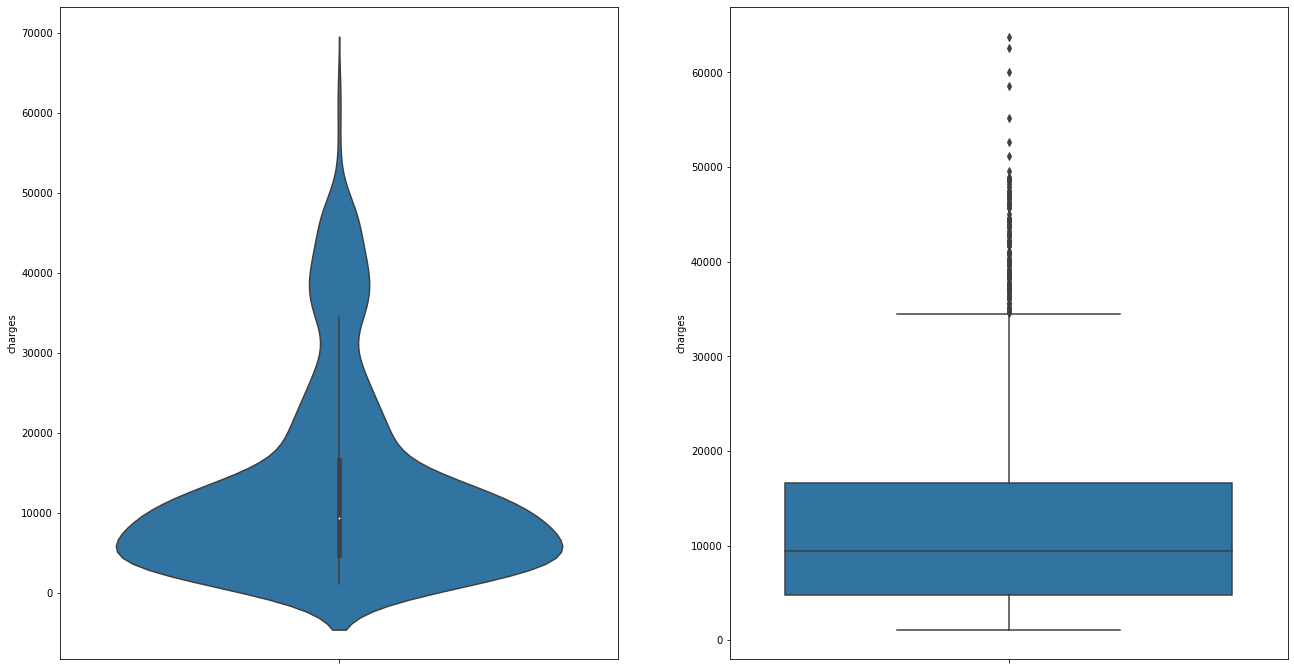

In [8]:
f, ax = plt.subplots(figsize=(22, 12))
plt.subplot(1, 2, 1)
sns.violinplot(y=df.charges)
plt.subplot(1,2,2)
sns.boxplot(y=df.charges)

#### Inference : The insurance charges of most of the population lies below 20000

Outliers in  BMI:

In [9]:
m = 30.40
q1 = 26.296250
q3 = 34.693750

iqr = q3 - q1

# Above Upper bound
upper = df['bmi'] >= (q3+1.5*iqr)

print(f"Upper Outlier: {np.where(upper)}")



# Below Lower bound
lower = df['bmi'] <= (q1-1.5*iqr)

print(f"Lower Outlier: {np.where(lower)}")


Upper Outlier: (array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)
Lower Outlier: (array([], dtype=int64),)


For removing outliers we take all the values in the range from Quantile value of 5%ile to 95%ile

In [10]:
df['bmi'] = df['bmi'].clip(lower=df['bmi'].quantile(0.05), upper=df['bmi'].quantile(0.95))

<AxesSubplot:>

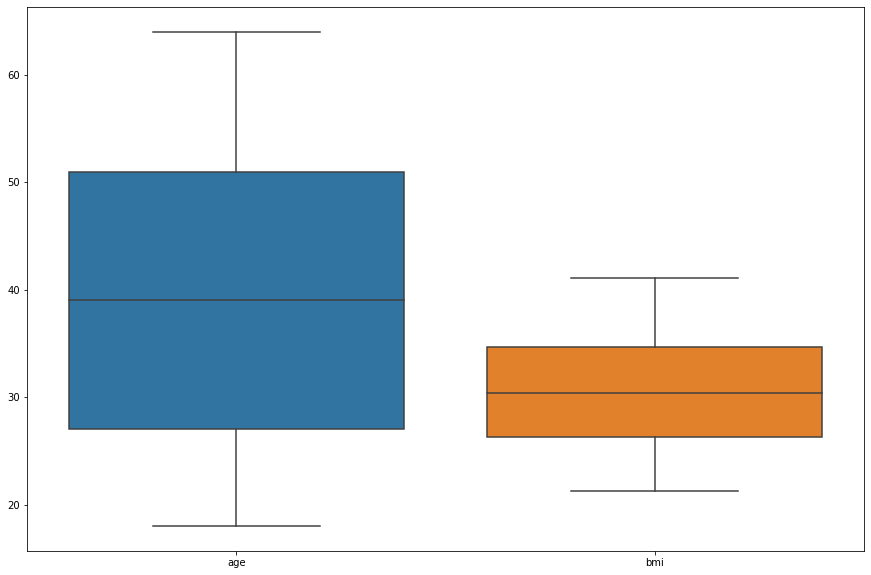

In [11]:
f, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data = df.drop(['charges','children'],axis=1))

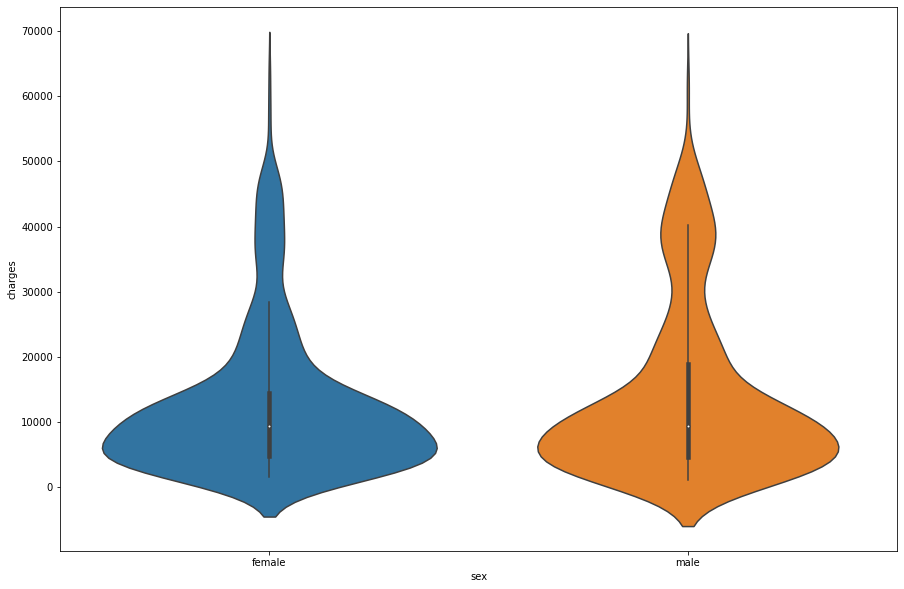

In [12]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.violinplot(x="sex", y="charges", data=df)

#### Inference : Most of the males and females have less than 20000 insurance charges.

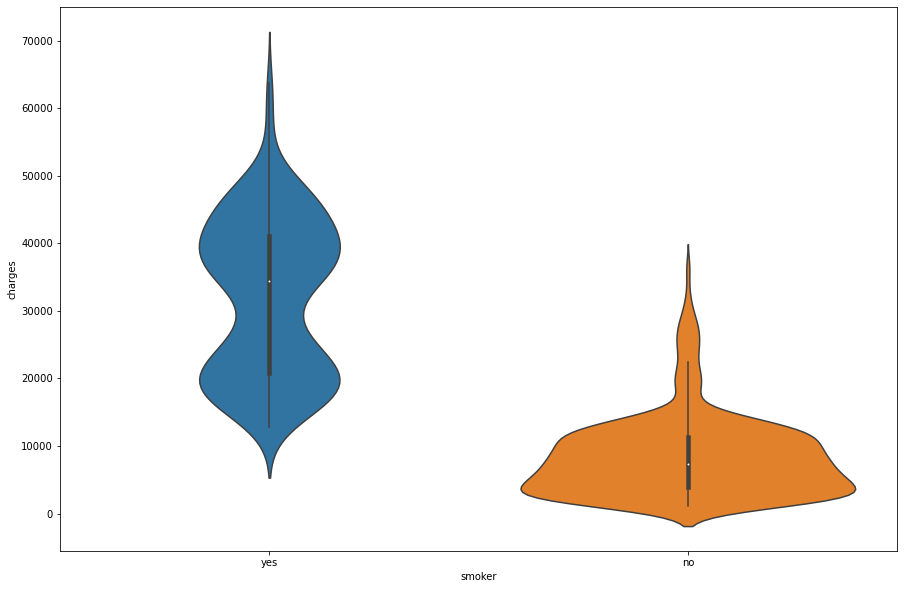

In [13]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.violinplot(x="smoker", y="charges", data=df)

#### Inference: If Charges are greater than 40,000 ,then a high probability is that the person is a smoker.

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Age')

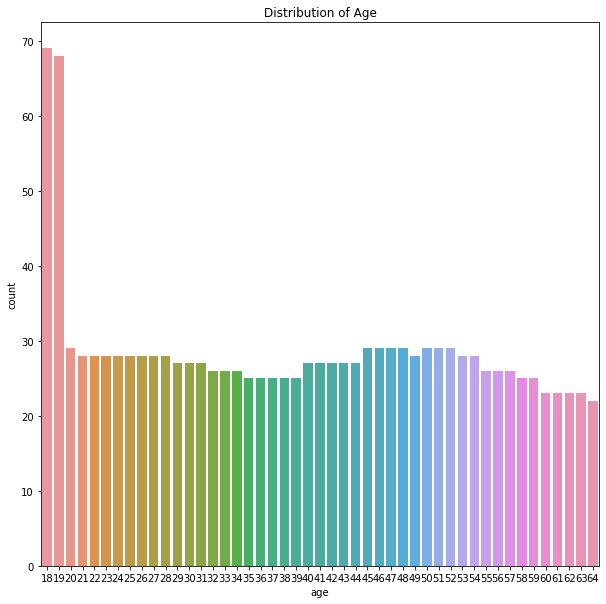

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(df['age'])
plt.title("Distribution of Age")

##### Inference : A high quantity of the population are either of age 18 and 19. Rest of the age are uniformally distributed and the number of people for rest ages are below 30.

20.47832585949178


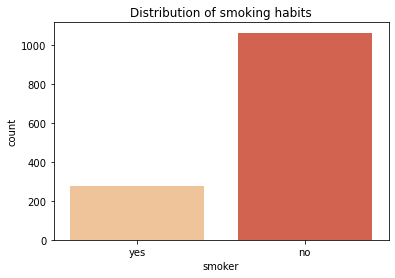

In [15]:
draw=sns.countplot(x='smoker',data=df, palette='OrRd')
plt.title('Distribution of smoking habits')
a=df['smoker'].value_counts()['yes']
print(a/13.38)

##### Inference :Almost 21% of the population smokes.

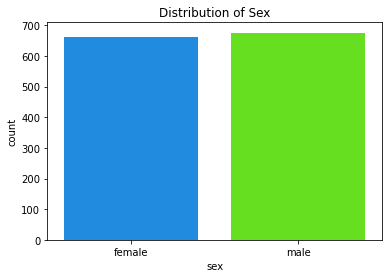

No. of Male citizens:  676
Percentage of Male citizens:  50.52316890881913 %
No. of Female citizens:  662
Percentage of Female citizens:  49.47683109118087 %


In [16]:
bar=sns.countplot(x='sex',data=df,palette='gist_rainbow_r')
plt.title("Distribution of Sex")
plt.show()

a=df['sex'].value_counts()['male']
b=df['sex'].value_counts()['female']
print("No. of Male citizens: ", a)
print("Percentage of Male citizens: ", (a*100)/1338,'%')
print("No. of Female citizens: ", b)
print("Percentage of Female citizens: ", (b*100)/1338,'%')

Text(0.5, 1.0, 'Distribution of Sex (based on smoking habit)')

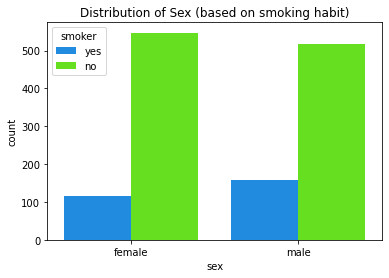

In [17]:
bar=sns.countplot(x='sex',hue='smoker',data=df,palette='gist_rainbow_r')
plt.title("Distribution of Sex (based on smoking habit)")


##### Inference : There are almost equal amount of males and females in the dataset and the number of male smokers are higher than the number of female smokers

The no. of people living in the Southwest are: 325
The no. of people living in the Southeast are: 364
The no. of people living in the Northwest are: 325
The no. of people living in the Northeast are: 324


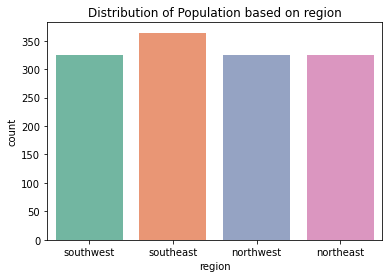

In [18]:
bar=sns.countplot(x='region',data=df,palette='Set2')
plt.title("Distribution of Population based on region")
a=df['region'].value_counts()['southwest']
b=df['region'].value_counts()['southeast']
c=df['region'].value_counts()['northwest']
d=df['region'].value_counts()['northeast']
print("The no. of people living in the Southwest are:", a)
print("The no. of people living in the Southeast are:", b)
print("The no. of people living in the Northwest are:", c)
print("The no. of people living in the Northeast are:", d)

##### Inference : The population is more or less fairly distributed in each region

Text(0.5, 1.0, 'Distribution of Population based on number of children')

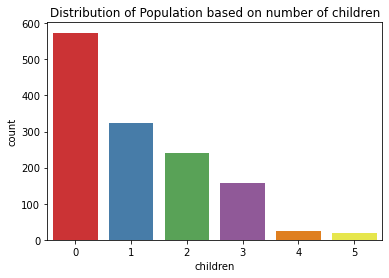

In [19]:
bar=sns.countplot(x='children',data=df,palette='Set1')
plt.title("Distribution of Population based on number of children")

##### Inference : A majority of the population doesn't have children. 

Text(0.5, 1.0, 'Distribution of Population based on number of children and smoking habit of the person')

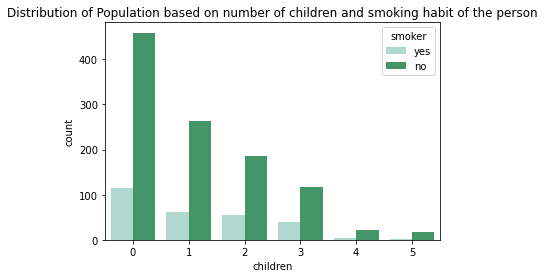

In [20]:
bar=sns.countplot(x='children',hue='smoker',data=df,palette='BuGn')
plt.title("Distribution of Population based on number of children and smoking habit of the person")


##### Inference : The number of people who smoke becomes less as the number of children they have increase.

In [21]:
!pip install plotly 
import plotly.express as px
fig = px.scatter(df, x="charges", y="age", color='smoker', color_discrete_map={'yes':'red', 'no':'green'})
fig.update_layout(legend_title_text='Smoker')
fig.show()

##### Inference :<br>1. Most of the people who had less insurance charges do not smoke.<br>2. Most of the people who had high insurance charges smoke.

In [22]:
import plotly.express as px
fig = px.scatter(df, x="bmi", y="age", color='smoker', color_discrete_map={'yes':'red', 'no':'green'})
fig.update_layout(legend_title_text='Smoker')
fig.show()

##### Inference : Smokers and Non smokers are distributed across all ranges of BMI and age. So, we are not able to find any pattern or extracct useful insights from this plot.

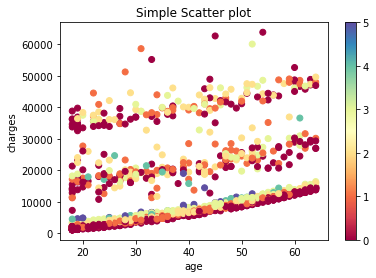

In [23]:
plt.scatter(df.age, df.charges, c=df.children, cmap='Spectral')
plt.colorbar()
plt.title('Simple Scatter plot')
plt.xlabel('age')
plt.ylabel('charges')

plt.show()

##### Inference :<br>1. Those who have charges<15000 contains customers having children either 0,1,2 and diversified across complete range of age.<br>2. Persons having children 2 or 3 are majorly paying less than 50000 and diversified across complete range of age.


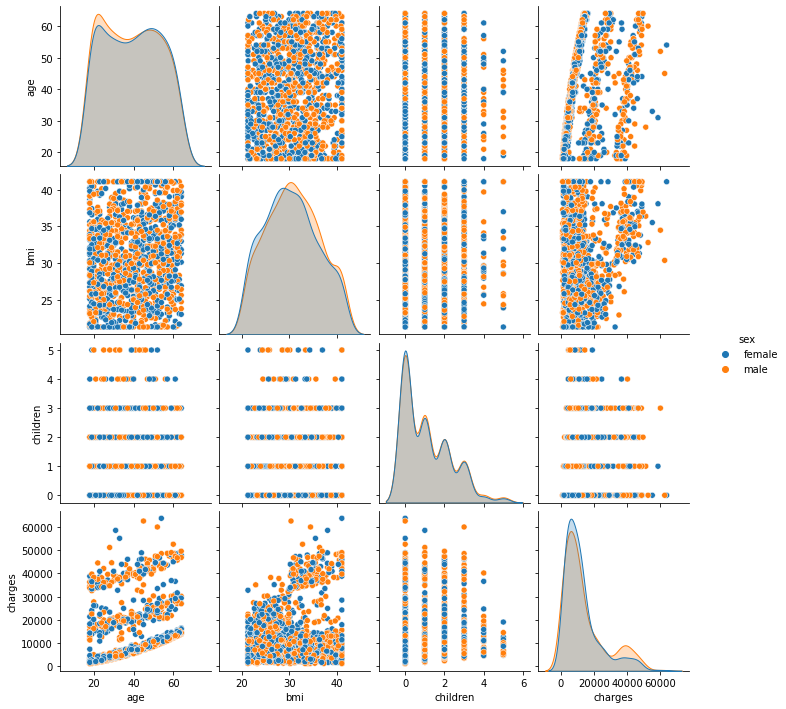

In [24]:
sns.pairplot(df, hue ='sex')

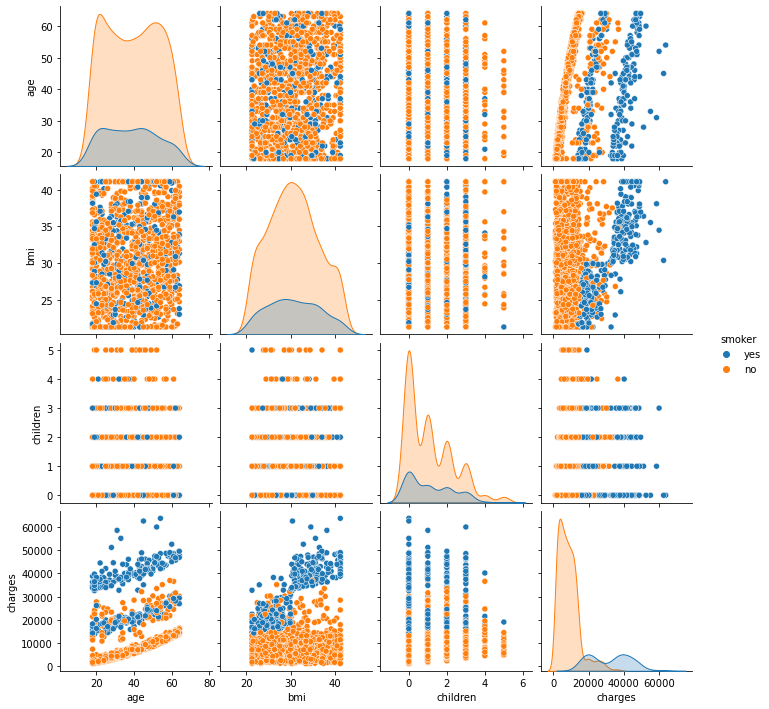

In [25]:
sns.pairplot(df, hue ='smoker')

#### Correlation Heatmap

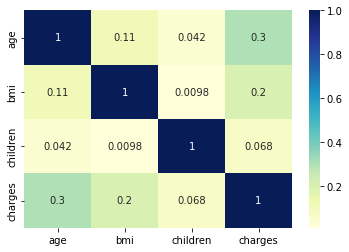

In [26]:
df.corr()
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Inference: All the Numeric attributes are positively coorelated to each other.

### Chi Square Test

Inference: Chi-square test is only applicable for Nominal Data that's why we first categorise some Numeric Data after that we apply chi-square test to find the co-relation condition.

#### Categorical data of bmi, age and charges

In [27]:
#Weight Classfication

df['weight classification'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, float('Inf')], labels=['underweight', 'normal', 'overweight','obese'])

#Charges Classfication

q1 = 4740.287150
q3 = 16639.912515

iqr = q3 - q1
u = q3+1.5*iqr
l = q1-1.5*iqr

df['charges classification'] = pd.cut(df['charges'], bins=[l, q1, q3, u, float('Inf')], labels=['lower', 'medium', 'high','very high'])

#Age Classification
df['age classification'] = pd.cut(df['age'], bins=[17, 30, 50,100], labels=['young', 'middle age', 'senior'])


In [28]:
df.sample(5)

age     sex     bmi  children smoker     region      charges  \
1110   54  female  32.300         1     no  northeast  11512.40500   
1067   39    male  41.106         0     no  northeast   5757.41345   
1019   21  female  32.680         2     no  northwest  26018.95052   
1296   18    male  26.125         0     no  northeast   1708.92575   
355    46    male  27.600         0     no  southwest  24603.04837   

     weight classification charges classification age classification  
1110                 obese                 medium             senior  
1067                 obese                 medium         middle age  
1019                 obese                   high              young  
1296            overweight                  lower              young  
355             overweight                   high         middle age

In [29]:
df1 = df.drop(['age', 'bmi','charges'],axis=1)
features = pd.Series(df1.drop('charges classification', axis=1).columns)

In [30]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# this function creates will automaticall generate the decision for the chi square test
def chi_square_test(data, feature):
    df = pd.crosstab(data[feature],data['charges classification'])
    stat, p, dof, expected = chi2_contingency(df)
    print(f'Chi-Square Test for {format(feature)}')

    print('degrees of freedom = %d' % dof)
    
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('Results:')
    print('probability = %.3f, critical = %.3f, stat = %.3f' % (prob, critical, stat))
    print("\n")
    print('Decision based on Chi-Square Statistics:')

    alpha = 1.0 - prob
    
    print('Decision based on p-value:')
    print('alpha = %.2f, p = %.3f' % (alpha, p))
    if p <= alpha:
        print(f'The Charges are dependent on {format(feature)} : Dependent (reject H0)')
    else:
        print(f'The Charges are independent on {format(feature)} : Independent (fail to reject H0)')
    print('\n\n')
    print('_'*70)

In [31]:
for feature in features:
    chi_square_test(df, feature)

Chi-Square Test for sex
degrees of freedom = 3
Results:
probability = 0.950, critical = 7.815, stat = 14.130


Decision based on Chi-Square Statistics:
Decision based on p-value:
alpha = 0.05, p = 0.003
The Charges are dependent on sex : Dependent (reject H0)



______________________________________________________________________
Chi-Square Test for children
degrees of freedom = 15
Results:
probability = 0.950, critical = 24.996, stat = 83.232


Decision based on Chi-Square Statistics:
Decision based on p-value:
alpha = 0.05, p = 0.000
The Charges are dependent on children : Dependent (reject H0)



______________________________________________________________________
Chi-Square Test for smoker
degrees of freedom = 3
Results:
probability = 0.950, critical = 7.815, stat = 919.541


Decision based on Chi-Square Statistics:
Decision based on p-value:
alpha = 0.05, p = 0.000
The Charges are dependent on smoker : Dependent (reject H0)



__________________________________________________

In [32]:
d=pd.DataFrame()
d1=['sex','children','smoker','region','bmi','age']
d2=[3,15,3,9,6,6]
d3=[0.950,0.950,0.950,0.950,0.950,0.950]
d4=[7.815,24.996,7.815,16.919,12.592,12.592]
d5=[14.130,83.232,919.541,29.318,157.272,665.487]
d6=[0.05,0.05,0.05,0.05,0.05,0.05]
d7=[0.003,0.000,0.000,0.001,0.000,0.000]
d8=['Dependent','Dependent','Dependent','Dependent','Dependent','Dependent']
d9=['Reject','Reject','Reject','Reject','Reject','Reject']

In [33]:
d['feature']=d1
d['Degree of Freedom']=d2
d['probability']=d3
d['critical']=d4
d['stat']=d5
d['alpha']=d6
d['p']=d7
d['Result of dependency on charge attribute']=d8
d['Reject or not Hypothesis']=d9

In [34]:
d

feature  Degree of Freedom  probability  critical     stat  alpha      p  \
0       sex                  3         0.95     7.815   14.130   0.05  0.003   
1  children                 15         0.95    24.996   83.232   0.05  0.000   
2    smoker                  3         0.95     7.815  919.541   0.05  0.000   
3    region                  9         0.95    16.919   29.318   0.05  0.001   
4       bmi                  6         0.95    12.592  157.272   0.05  0.000   
5       age                  6         0.95    12.592  665.487   0.05  0.000   

  Result of dependency on charge attribute Reject or not Hypothesis  
0                                Dependent                   Reject  
1                                Dependent                   Reject  
2                                Dependent                   Reject  
3                                Dependent                   Reject  
4                                Dependent                   Reject  
5                                Dependent                   Reject

Infrence: From the Chi-square test we can say that sex, no. of children region, weight classification, age classification and Smoking habit are co-related with the Charge classification.